# Experiment Analysis Number Of Patterns Retained 
In this notebook we will evaluate the results form the experiments executed. For each experiment, one parameter is changed and all others were kept constant as to determine the effect of one variable. 

**The goals of this analysis are:**
1. Determine the relationship of the number of parameters in the neural network and the number of random uncorrelated patterns that were retained 
2. Investigate which activation function lead to the highest retention of patterns
3. Determine what effect bidirectional RNNs has on this relationship
4. Determine the effect of increasing the number of layers have on pattern retention

To determine whether a relationshop exists between the variable being investigated and the number of required parameters in each respective neural network, the Pearson correlation coefficient is used. The domain of this metric lies between -1 and +1 or in mathematical notation $P \in [-1, 1]$. If there exists a strong positive relationship between variables, the Pearson coefficient will approach +1 and for the negative case -1. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import pandas as pd
from sqlalchemy import Column, Integer, String
from sqlalchemy import create_engine, Column
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Number of Patterns Analysis

In [2]:
! ls  /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/from_server/ | wc -l

6


In [3]:
print("INFO:root:bidirgru;linear;4536;[216];3;4;282961;1;{'val_loss': [0.28120091557502747, 0.1132935956120491], 'loss': [0.41719042882323265, 0.19011458661407232], 'lr': [0.001, 0.001]};1.0".count(";"))
print("INFO:root:lstm;softmax;504;[420, 42];0;5;786787;699;{'val_loss': [0.3983786255121231, 0.38453641533851624, 0.37102413177490234, 0.35796700417995453, 0.3453146666288376, 0.3330612927675247, 0.32121409475803375, 0.3097362518310547, 0.2987896651029587, 0.2881261706352234, 0.2778322100639343, 0.26803746819496155, 0.25844745337963104, 0.2492733672261238, 0.24045316129922867, 0.2320057973265648, 0.22390616685152054, 0.21603740751743317, 0.20860742777585983, 0.20134034752845764, 0.19443238526582718, 0.18777956068515778, 0.18148573487997055, 0.17552954703569412, 0.16970320791006088, 0.16423241794109344, 0.15901590138673782, 0.15400884300470352, 0.14939148724079132, 0.14484168589115143, 0.14052481949329376, 0.1363724321126938, 0.13253740966320038, 0.12893234938383102, 0.12547318637371063, 0.12218526750802994, 0.11913982406258583, 0.11624228209257126, 0.1134972907602787, 0.11090944707393646, 0.10857299715280533, 0.10638427734375, 0.10427320003509521, 0.10227495804429054, 0.10043990612030029, 0.09870023652911186, 0.09711764380335808, 0.09561265632510185, 0.09424823522567749, 0.09297456219792366, 0.09179184213280678, 0.09071826562285423, 0.08970387652516365, 0.08881306275725365, 0.08799967914819717, 0.08725852891802788, 0.08655820786952972, 0.08593429252505302, 0.08534976840019226, 0.08481515944004059, 0.08431608602404594, 0.08388398215174675, 0.08351462334394455, 0.08317387104034424, 0.0828644409775734, 0.08258114755153656, 0.08232851326465607, 0.08212883770465851, 0.08193894848227501, 0.08175777271389961, 0.08162573724985123, 0.08149046450853348, 0.08138538524508476, 0.08129540458321571, 0.0812181867659092, 0.08114006742835045, 0.08108066767454147, 0.0810345746576786, 0.08099574595689774, 0.08096638694405556, 0.08094511553645134, 0.08092690259218216, 0.08091053366661072, 0.08090177178382874, 0.08089762926101685, 0.08089552447199821, 0.08089630678296089, 0.08089904859662056, 0.08090488985180855, 0.08091182634234428, 0.08091302961111069, 0.08091454952955246, 0.08091641962528229, 0.08091770485043526, 0.08091961964964867, 0.08092164620757103, 0.08092299476265907, 0.08092446997761726, 0.08092684671282768, 0.08092834427952766, 0.0809287540614605, 0.08092892915010452, 0.08092926815152168, 0.08092979341745377, 0.08093004673719406, 0.08093057945370674, 0.08093081787228584, 0.08093129843473434, 0.08093157783150673, 0.08093202114105225, 0.08093208819627762, 0.08093219250440598, 0.08093225210905075, 0.0809323601424694, 0.08093240484595299, 0.08093249797821045, 0.08093256875872612, 0.08093263953924179, 0.08093273639678955, 0.08093282207846642, 0.08093284070491791, 0.0809328518807888, 0.08093288540840149, 0.08093288168311119, 0.08093291521072388, 0.08093293383717537, 0.08093294501304626, 0.08093294873833656, 0.08093296363949776, 0.08093299344182014, 0.08093298971652985, 0.08093299344182014, 0.08093300834298134, 0.08093300461769104, 0.08093301206827164, 0.08093301951885223, 0.08093303442001343, 0.08093303442001343, 0.08093302696943283, 0.08093303442001343, 0.08093303442001343, 0.08093304932117462, 0.08093304932117462, 0.08093303814530373, 0.08093303814530373, 0.08093303814530373, 0.08093303814530373, 0.08093303814530373, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313], 'loss': [0.4252263940870762, 0.4107074700295925, 0.3967253491282463, 0.38293588161468506, 0.36963945627212524, 0.3567313514649868, 0.3442135415971279, 0.332243625074625, 0.3203633688390255, 0.3092553988099098, 0.29840399138629436, 0.28772095777094364, 0.27783876843750477, 0.2680079285055399, 0.25859800539910793, 0.24951045960187912, 0.24078041687607765, 0.23254163190722466, 0.22432496584951878, 0.21680372022092342, 0.2093129064887762, 0.20227103307843208, 0.19535507448017597, 0.18873452208936214, 0.18268926441669464, 0.17658725008368492, 0.17087750602513552, 0.16547849215567112, 0.16006775572896004, 0.15532528050243855, 0.15059258230030537, 0.14619070943444967, 0.141777235083282, 0.13768674992024899, 0.13391122221946716, 0.13030045479536057, 0.1267700418829918, 0.12354664504528046, 0.12049439549446106, 0.11760237347334623, 0.11472619976848364, 0.11214588209986687, 0.1098040072247386, 0.10755961108952761, 0.10537664964795113, 0.10342059750109911, 0.10149191226810217, 0.09979743976145983, 0.0981165124103427, 0.09661287069320679, 0.09520806930959225, 0.09386604651808739, 0.09269081987440586, 0.09149063471704721, 0.09043796733021736, 0.0894637955352664, 0.08860537083819509, 0.08775858674198389, 0.08702118322253227, 0.0863319132477045, 0.08572038356214762, 0.08510104939341545, 0.0845292704179883, 0.08405588008463383, 0.08361594937741756, 0.08322273939847946, 0.08285888936370611, 0.08247195463627577, 0.08219191990792751, 0.08195182774215937, 0.08164077997207642, 0.08146057510748506, 0.08122800383716822, 0.0810420410707593, 0.08087771385908127, 0.08076748717576265, 0.08061439078301191, 0.08048516372218728, 0.0803829119540751, 0.0802813982591033, 0.08019027253612876, 0.08012297190725803, 0.08008034806698561, 0.08000371139496565, 0.07993494253605604, 0.07989795226603746, 0.07986167585477233, 0.07981726806610823, 0.07979537919163704, 0.0797615172341466, 0.07973967865109444, 0.0797355636022985, 0.07973307836800814, 0.07972606178373098, 0.07972454372793436, 0.07972064521163702, 0.07971310615539551, 0.07970941811800003, 0.07970907352864742, 0.07970144506543875, 0.07969885319471359, 0.07969758287072182, 0.07969713397324085, 0.07969695469364524, 0.0796954408288002, 0.07969550974667072, 0.07969386968761683, 0.07969370391219854, 0.07969241961836815, 0.07969203032553196, 0.07969123683869839, 0.07969117723405361, 0.07969095185399055, 0.07969091832637787, 0.07969061937183142, 0.07969056814908981, 0.07969034183770418, 0.07969018816947937, 0.07969008106738329, 0.07968989200890064, 0.07968981750309467, 0.07968976814299822, 0.07968974905088544, 0.07968970481306314, 0.07968969456851482, 0.07968964707106352, 0.07968961307778955, 0.0796895595267415, 0.07968956138938665, 0.07968950178474188, 0.07968947943300009, 0.07968947011977434, 0.0796894608065486, 0.07968946825712919, 0.07968945428729057, 0.0796894459053874, 0.07968944404274225, 0.0796894347295165, 0.07968943193554878, 0.07968941843137145, 0.07968942169100046, 0.07968941982835531, 0.07968942914158106, 0.07968942448496819, 0.07968942262232304, 0.07968942262232304, 0.0796894240193069, 0.07968941982835531, 0.07968941237777472, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.07968940818682313, 0.07968941144645214, 0.07968940958380699, 0.07968941098079085, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.0796894058585167, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968941098079085, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968941144645214, 0.07968940958380699, 0.07968940772116184, 0.0796894058585167, 0.07968940958380699, 0.0796894058585167, 0.07968940958380699, 0.07968940958380699, 0.07968941144645214, 0.0796894091181457, 0.07968940958380699, 0.07968940678983927, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940958380699, 0.07968940725550056, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.07968940772116184, 0.07968941051512957, 0.07968940678983927, 0.07968941237777472, 0.07968940678983927, 0.07968940772116184, 0.07968940865248442, 0.0796894058585167, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.0796894058585167, 0.07968940678983927, 0.0796894091181457, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968941051512957, 0.07968940678983927, 0.07968940678983927, 0.07968940958380699, 0.0796894091181457, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968941051512957, 0.07968941004946828, 0.07968940958380699, 0.07968941004946828, 0.07968941144645214, 0.07968940865248442, 0.07968940865248442, 0.07968940678983927, 0.07968940678983927, 0.0796894058585167, 0.07968940958380699, 0.07968940772116184, 0.07968940678983927, 0.07968941051512957, 0.07968941051512957, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968940678983927, 0.07968940772116184, 0.07968940818682313, 0.07968940772116184, 0.07968940678983927, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.07968940818682313, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968941144645214, 0.07968941144645214, 0.07968941330909729, 0.0796894058585167, 0.07968941098079085, 0.07968940632417798, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940772116184, 0.07968941237777472, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968940678983927, 0.07968940865248442, 0.0796894058585167, 0.07968940865248442, 0.07968941144645214, 0.07968940958380699, 0.07968940958380699, 0.0796894058585167, 0.07968940958380699, 0.0796894058585167, 0.07968941237777472, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940865248442, 0.07968940678983927, 0.07968941237777472, 0.07968941144645214, 0.07968940958380699, 0.07968940772116184, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940678983927, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968941330909729, 0.07968940958380699, 0.07968940818682313, 0.07968941144645214, 0.07968940678983927, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.0796894091181457, 0.07968940772116184, 0.07968941051512957, 0.07968940678983927, 0.07968941051512957, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968941330909729, 0.07968941144645214, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968941330909729, 0.07968940958380699, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940678983927, 0.07968940865248442, 0.0796894058585167, 0.07968941051512957, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968941144645214, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968941098079085, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968940492719412, 0.07968940865248442, 0.07968941144645214, 0.07968941144645214, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940492719412, 0.07968941144645214, 0.07968941237777472, 0.07968940958380699, 0.07968941237777472, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968941144645214, 0.0796894091181457, 0.0796894058585167, 0.0796894058585167, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968941144645214, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968941051512957, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968941237777472, 0.07968940678983927, 0.07968941144645214, 0.07968940492719412, 0.07968940772116184, 0.07968940865248442, 0.07968940678983927, 0.07968940865248442, 0.07968940678983927, 0.0796894091181457, 0.07968940772116184, 0.07968940958380699, 0.07968941144645214, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940865248442, 0.07968940678983927, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968941004946828, 0.07968940865248442, 0.07968940772116184, 0.07968941098079085, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968941237777472, 0.07968941051512957, 0.07968940772116184, 0.07968941144645214, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940725550056, 0.07968940725550056, 0.07968941144645214, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968940818682313, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940958380699, 0.07968941330909729, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941237777472, 0.07968940958380699, 0.07968940865248442, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968941051512957, 0.07968940958380699, 0.07968941051512957, 0.07968940492719412, 0.0796894091181457, 0.07968940865248442, 0.07968940772116184, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968940678983927, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940492719412, 0.07968940958380699, 0.0796894091181457, 0.07968940678983927, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940678983927, 0.07968941144645214, 0.07968941051512957, 0.0796894091181457, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.07968941144645214, 0.07968940772116184, 0.07968941144645214, 0.07968941237777472, 0.07968940492719412, 0.07968940772116184, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968941051512957, 0.07968940725550056, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940678983927, 0.07968941051512957, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940818682313, 0.0796894058585167, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968941144645214, 0.07968940958380699, 0.07968941144645214, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.0796894058585167, 0.07968940772116184, 0.07968940725550056, 0.07968940678983927, 0.07968940678983927, 0.07968941051512957, 0.07968940678983927, 0.07968940678983927, 0.07968940678983927, 0.07968941237777472, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968941051512957, 0.07968941144645214, 0.07968940958380699, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968941237777472, 0.0796894058585167, 0.07968940865248442, 0.07968940958380699, 0.07968941144645214, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968940678983927, 0.07968940865248442, 0.07968941144645214, 0.07968940772116184, 0.0796894058585167, 0.07968941144645214, 0.07968941051512957, 0.07968941144645214, 0.07968940958380699, 0.07968940772116184, 0.07968940678983927, 0.07968941144645214, 0.07968940865248442, 0.07968941051512957, 0.0796894058585167, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940678983927, 0.07968940958380699, 0.0796894091181457, 0.07968940865248442, 0.07968940772116184, 0.07968940772116184, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968940772116184, 0.07968941144645214, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.0796894091181457, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968941237777472], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13]};0.6".count(";"))
print("INFO:root:lstm;softmax;504;[420, 42];0;2;786787;699;{'val_loss': [0.692264586687088, 0.6728518605232239, 0.6537942290306091, 0.6349968016147614, 0.6168437004089355, 0.5989132821559906, 0.5815097689628601, 0.5645691156387329, 0.5478562712669373, 0.5317398011684418, 0.5159025192260742, 0.5005050748586655, 0.4855778217315674, 0.470770463347435, 0.45669853687286377, 0.4428652375936508, 0.4293307512998581, 0.4162876009941101, 0.40348581969738007, 0.39117057621479034, 0.3789701461791992, 0.3672144412994385, 0.3557344079017639, 0.34449970722198486, 0.33364708721637726, 0.3231334537267685, 0.31297294795513153, 0.3029703199863434, 0.2933391034603119, 0.2840083986520767, 0.27498701214790344, 0.2663957178592682, 0.2577584907412529, 0.24962542951107025, 0.2416173294186592, 0.2339610531926155, 0.22651827335357666, 0.21936434507369995, 0.21249397844076157, 0.20571515709161758, 0.1992669701576233, 0.19321629405021667, 0.18719889968633652, 0.18140313774347305, 0.17578165978193283, 0.17054304480552673, 0.16534630954265594, 0.16039365530014038, 0.15563255548477173, 0.15115492790937424, 0.14675720036029816, 0.1426539421081543, 0.138633094727993, 0.13485825806856155, 0.1312158778309822, 0.1276954524219036, 0.12429976835846901, 0.12122372165322304, 0.11814893782138824, 0.11528777331113815, 0.11263982951641083, 0.11003580316901207, 0.10746631026268005, 0.10508771613240242, 0.10289902985095978, 0.10071289539337158, 0.09871361777186394, 0.09690633416175842, 0.09494754672050476, 0.09326542913913727, 0.0917048454284668, 0.09009574353694916, 0.08874957263469696, 0.08727524802088737, 0.08602619916200638, 0.08483206480741501, 0.08365482091903687, 0.08260226622223854, 0.08157964050769806, 0.08058273792266846, 0.07959915697574615, 0.07879029586911201, 0.07795252278447151, 0.07716524973511696, 0.07649614289402962, 0.07581100985407829, 0.07521096989512444, 0.07454393431544304, 0.07403041794896126, 0.0734880305826664, 0.0729784406721592, 0.07247760891914368, 0.07205909863114357, 0.07160364091396332, 0.07123466953635216, 0.07086759433150291, 0.07050895318388939, 0.07022949680685997, 0.06992213428020477, 0.06960899755358696, 0.06933682039380074, 0.0690443217754364, 0.06890014931559563, 0.06872967630624771, 0.06848245859146118, 0.06823094189167023, 0.06805144622921944, 0.06789520010352135, 0.06771188974380493, 0.06755925342440605, 0.0673341155052185, 0.06725715473294258, 0.06709527224302292, 0.06697875633835793, 0.06682437285780907, 0.06678761541843414, 0.06672659888863564, 0.0665416419506073, 0.06637173146009445, 0.066279336810112, 0.06627336144447327, 0.06621242687106133, 0.06616439297795296, 0.06602293252944946, 0.06595757231116295, 0.06589305773377419, 0.06581268459558487, 0.06572281196713448, 0.06568167731165886, 0.06563541293144226, 0.06559982150793076, 0.06554965302348137, 0.06556375324726105, 0.06557313352823257, 0.06550070643424988, 0.06538034975528717, 0.0653417743742466, 0.06530030071735382, 0.0652681477367878, 0.06525479257106781, 0.06523960828781128, 0.06519636884331703, 0.06521301716566086, 0.06520490348339081, 0.06514887511730194, 0.06509527564048767, 0.06510274112224579, 0.06505642458796501, 0.06502475216984749, 0.06505850702524185, 0.06500178202986717, 0.0649917759001255, 0.06497826799750328, 0.06500091031193733, 0.06498857587575912, 0.06490057706832886, 0.06489717960357666, 0.0648229829967022, 0.06486405432224274, 0.06482822448015213, 0.06483915448188782, 0.06489592790603638, 0.06478406116366386, 0.06472115591168404, 0.06473585590720177, 0.06467972695827484, 0.0646900050342083, 0.06461984664201736, 0.06463943421840668, 0.06466827541589737, 0.06471636891365051, 0.06465944647789001, 0.06467822566628456, 0.06469512730836868, 0.06463580578565598, 0.06456303596496582, 0.0645919069647789, 0.0646786279976368, 0.06463231518864632, 0.06454766914248466, 0.06448833271861076, 0.06453464180231094, 0.06454937160015106, 0.06453320384025574, 0.06447531655430794, 0.06442787870764732, 0.06441519781947136, 0.06440586596727371, 0.06450652703642845, 0.06448526680469513, 0.06448811292648315, 0.06443092226982117, 0.06438378989696503, 0.06446905806660652, 0.06444629654288292, 0.06441006064414978, 0.06439933180809021, 0.06439012289047241, 0.06438679993152618, 0.06437429785728455, 0.0643768310546875, 0.06438210234045982, 0.06438241899013519, 0.06438378244638443, 0.06437018513679504, 0.06436214596033096, 0.06436033174395561, 0.06436026096343994, 0.06435933336615562, 0.06436166539788246, 0.064358901232481, 0.06436130031943321, 0.06436247006058693, 0.06436223536729813, 0.06436246261000633, 0.06435996294021606, 0.0643601268529892, 0.06435877084732056, 0.0643596351146698, 0.06435970216989517, 0.06435978785157204, 0.06435896083712578, 0.06435950100421906, 0.06435859575867653, 0.06435887143015862, 0.06435820460319519, 0.06435812264680862, 0.0643581710755825, 0.06435810029506683, 0.06435804069042206, 0.06435805559158325, 0.06435811519622803, 0.06435810029506683, 0.06435808911919594, 0.064358189702034, 0.06435805559158325, 0.06435805559158325, 0.06435804069042206, 0.06435805559158325, 0.06435803696513176, 0.06435805559158325, 0.06435805559158325, 0.06435803323984146, 0.06435805559158325, 0.06435805559158325, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997], 'loss': [0.5876753404736519, 0.5700119845569134, 0.5525041967630386, 0.5357609838247299, 0.518819659948349, 0.5028991028666496, 0.4868825525045395, 0.4714743234217167, 0.45676111429929733, 0.4419415183365345, 0.42792442068457603, 0.4140820913016796, 0.4005451500415802, 0.38786424323916435, 0.37473947554826736, 0.3625703789293766, 0.3506751097738743, 0.3388835061341524, 0.3277031220495701, 0.3165533021092415, 0.30614939890801907, 0.29569633677601814, 0.2857394888997078, 0.2761324364691973, 0.26666413620114326, 0.2575349174439907, 0.24867320992052555, 0.24032256565988064, 0.23200547322630882, 0.22403862327337265, 0.2163277268409729, 0.20874075777828693, 0.20193153247237206, 0.19477589800953865, 0.18827957846224308, 0.18177971802651882, 0.1756659559905529, 0.16970103979110718, 0.16396370716392994, 0.15865539014339447, 0.15331661608070135, 0.1481201220303774, 0.14348838943988085, 0.13887810986489058, 0.13451774418354034, 0.13013651128858328, 0.12627833243459463, 0.1224061194807291, 0.11876305472105742, 0.11519856657832861, 0.11199724487960339, 0.10875008162111044, 0.10586169548332691, 0.10296329949051142, 0.10031863767653704, 0.09782600589096546, 0.09546782728284597, 0.09305630065500736, 0.09105723537504673, 0.08898501377552748, 0.08703123172745109, 0.085324892308563, 0.08374257851392031, 0.08212192030623555, 0.08059875201433897, 0.0793210887350142, 0.0779789132066071, 0.0767189571633935, 0.07581115188077092, 0.07462552934885025, 0.07363874558359385, 0.07285420829430223, 0.07189182890579104, 0.07126767514273524, 0.07044574758037925, 0.06979530956596136, 0.06921983044594526, 0.06862518424168229, 0.06812417833134532, 0.06766551686450839, 0.06725845905020833, 0.06678262446075678, 0.0664607030339539, 0.06611676001921296, 0.06576722580939531, 0.06551252212375402, 0.06522974744439125, 0.0650498983450234, 0.06477313954383135, 0.06459950283169746, 0.06442168587818742, 0.064265928696841, 0.06409266265109181, 0.06398702412843704, 0.06383415823802352, 0.06372844893485308, 0.06363447662442923, 0.06352402316406369, 0.06344601279124618, 0.06337579758837819, 0.06329536391422153, 0.06325468607246876, 0.06315814889967442, 0.06311222491785884, 0.06307174218818545, 0.06303230533376336, 0.06297913799062371, 0.06293554604053497, 0.0629043192602694, 0.06286900769919157, 0.06286286376416683, 0.06280866079032421, 0.06279368326067924, 0.06276052026078105, 0.06274656532332301, 0.06271897489205003, 0.06271223071962595, 0.06269358051940799, 0.06268123723566532, 0.0626477007754147, 0.0626334766857326, 0.06261177873238921, 0.06260395608842373, 0.06259420234709978, 0.06257159914821386, 0.06255693966522813, 0.0625471118837595, 0.06254123291000724, 0.06252158060669899, 0.0625089081004262, 0.0624979343265295, 0.06249070819467306, 0.062478207051754, 0.06247423170134425, 0.06245574587956071, 0.06246033962816, 0.06243369309231639, 0.06242757756263018, 0.06241615582257509, 0.06240680394694209, 0.06239367229864001, 0.0623881365172565, 0.062376228626817465, 0.06236714590340853, 0.0623562796972692, 0.0623513450846076, 0.06233838200569153, 0.062332633417099714, 0.06232014251872897, 0.06231545843183994, 0.0623054257594049, 0.06229612464085221, 0.062282225117087364, 0.06228072941303253, 0.06226402008906007, 0.06226015090942383, 0.062246883288025856, 0.06224349467083812, 0.062232667580246925, 0.062220350839197636, 0.062212527729570866, 0.06222188798710704, 0.06220340169966221, 0.0621897685341537, 0.06217513792216778, 0.062179252970963717, 0.0621565175242722, 0.06216079369187355, 0.06214133137837052, 0.06213201116770506, 0.06212729774415493, 0.06211861688643694, 0.062108364421874285, 0.0621008793823421, 0.06209163321182132, 0.0620917365886271, 0.06207100860774517, 0.06208707531914115, 0.06205339357256889, 0.06205146200954914, 0.06204713322222233, 0.062030785251408815, 0.06202196329832077, 0.06201188964769244, 0.06200442695990205, 0.061997882556170225, 0.06198930507525802, 0.061977487057447433, 0.06198592251166701, 0.06195758655667305, 0.06195157486945391, 0.06194559810683131, 0.06194149004295468, 0.06194043951109052, 0.061914867255836725, 0.061910320073366165, 0.061898961663246155, 0.0618973458185792, 0.061895512510091066, 0.06189511762931943, 0.061891531106084585, 0.06189005263149738, 0.06188833760097623, 0.061886623967438936, 0.06188525725156069, 0.0618840497918427, 0.06188145838677883, 0.06188100855797529, 0.061880781315267086, 0.06188042415305972, 0.06188053451478481, 0.06188003160059452, 0.061879293993115425, 0.061878891196101904, 0.061878602020442486, 0.061878152657300234, 0.06187787186354399, 0.06187813216820359, 0.06187784532085061, 0.06187765719369054, 0.06187763577327132, 0.0618775449693203, 0.061877507250756025, 0.061877443455159664, 0.0618773614987731, 0.061877287458628416, 0.06187715893611312, 0.0618771412409842, 0.0618771375156939, 0.061877123080193996, 0.06187711050733924, 0.06187709793448448, 0.061877075117081404, 0.06187707278877497, 0.06187708396464586, 0.06187704158946872, 0.0618770238943398, 0.061877028085291386, 0.06187701504677534, 0.061877022963017225, 0.06187702342867851, 0.06187701225280762, 0.061876998748630285, 0.06187700945883989, 0.06187701318413019, 0.061877002008259296, 0.06187699502333999, 0.06187699316069484, 0.0618769945576787, 0.06187699595466256, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699409201741, 0.06187699595466256, 0.06187699222937226, 0.06187699502333999, 0.061876993626356125, 0.06187699502333999, 0.06187699735164642, 0.06187699502333999, 0.06187699595466256, 0.06187699642032385, 0.06187699502333999, 0.0618769945576787, 0.061876996885985136, 0.0618769945576787, 0.061876993626356125, 0.0618769945576787, 0.061876996885985136, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699735164642, 0.061876995489001274, 0.061876993626356125, 0.061876995489001274, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.0618769945576787, 0.061876993626356125, 0.061876993626356125, 0.06187699316069484, 0.06187699502333999, 0.06187699409201741, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.061876993626356125, 0.0618769945576787, 0.061876993626356125, 0.061876995489001274, 0.06187699316069484, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.06187699595466256, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.0618769945576787, 0.06187699409201741, 0.061876995489001274, 0.06187699595466256, 0.061876995489001274, 0.061876993626356125, 0.06187699502333999, 0.061876993626356125, 0.06187699409201741, 0.061876995489001274, 0.061876995489001274, 0.06187699595466256, 0.0618769945576787, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.06187699642032385, 0.06187699409201741, 0.061876995489001274, 0.06187699595466256, 0.06187699502333999, 0.0618769945576787, 0.06187699269503355, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.061876993626356125, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.06187699269503355, 0.06187699642032385, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.06187699316069484, 0.061876993626356125, 0.061876995489001274, 0.061876993626356125, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.061876996885985136, 0.06187699595466256, 0.06187699409201741, 0.061876993626356125, 0.06187699642032385, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.061876995489001274, 0.06187699409201741, 0.061876993626356125, 0.0618769945576787, 0.061876993626356125, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.06187699316069484, 0.06187699595466256, 0.06187699409201741, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.061876993626356125, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.06187699642032385, 0.0618769945576787, 0.06187699316069484, 0.061876993626356125, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.06187699595466256, 0.06187699595466256, 0.0618769945576787, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699642032385, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699316069484, 0.06187699409201741, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699642032385, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.06187699222937226, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.06187699595466256, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699595466256, 0.061876993626356125, 0.0618769945576787, 0.06187699642032385, 0.06187699502333999, 0.06187699409201741, 0.061876993626356125, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.061876993626356125, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.06187699316069484, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699595466256, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699316069484, 0.0618769945576787, 0.0618769945576787, 0.06187699409201741, 0.061876993626356125, 0.06187699409201741, 0.061876996885985136, 0.06187699595466256, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699642032385, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699642032385, 0.06187699502333999, 0.061876993626356125, 0.061876995489001274, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.06187699316069484, 0.06187699595466256, 0.06187699595466256, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.061876995489001274, 0.061876995489001274, 0.06187699316069484, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699409201741, 0.0618769945576787, 0.06187699642032385, 0.0618769945576787, 0.061876996885985136, 0.06187699409201741, 0.061876995489001274, 0.0618769945576787, 0.06187699409201741, 0.0618769945576787, 0.06187699409201741, 0.06187699316069484, 0.06187699642032385, 0.06187699316069484, 0.061876995489001274, 0.0618769945576787, 0.06187699409201741, 0.06187699409201741, 0.0618769945576787, 0.061876996885985136, 0.06187699409201741, 0.0618769945576787, 0.06187699595466256, 0.06187699409201741, 0.0618769945576787, 0.061876995489001274, 0.061876993626356125, 0.0618769945576787, 0.06187699502333999, 0.06187699269503355, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.061876993626356125, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.06187699409201741, 0.06187699595466256, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699642032385, 0.06187699595466256, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.061876996885985136, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.061876993626356125, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699595466256, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699409201741, 0.06187699502333999, 0.061876993626356125, 0.061876995489001274, 0.06187699595466256, 0.0618769945576787, 0.06187699409201741, 0.0618769945576787, 0.061876996885985136, 0.06187699502333999, 0.061876993626356125, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699642032385, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.06187699316069484, 0.06187699316069484, 0.061876993626356125, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.0618769945576787, 0.061876993626356125, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.061876995489001274, 0.061876993626356125, 0.06187699269503355, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.061876991763710976, 0.061876995489001274, 0.0618769945576787, 0.0618769945576787, 0.06187699595466256, 0.06187699595466256, 0.06187699316069484, 0.061876995489001274, 0.06187699269503355, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.061876993626356125, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.061876993626356125, 0.06187699502333999], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13]};0.5".count(";"))


9
9
9


In [4]:
LSTM="lstm"
ELMAN_RNN="elman"
JORDAN_RNN="jordan"
GRU="gru"
BIDIRECTIONAL_RNN="bidirelamn"
BIDIRECTIONAL_LSTM="bidirlstm"
BIDIRECTIONAL_GRU="bidirgru"

def determine_model_parameters(row):
    nodes_in_layers = eval(row["nodes_in_layer"])
    nn_type = row["nn_type"]
    if nn_type == BIDIRECTIONAL_RNN:
        return sum(nodes_in_layers) * 6
    if nn_type == BIDIRECTIONAL_GRU:
        return sum(nodes_in_layers) * 21
    if nn_type == BIDIRECTIONAL_LSTM:
        return sum(nodes_in_layers) * 24
    if nn_type == LSTM:
        return sum(nodes_in_layers) *12
    if nn_type == GRU:
        return sum(nodes_in_layers) *9
    return sum(nodes_in_layers) * 3


In [5]:
df = pd.read_csv("/home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/from_server/100_0_False_num_patterns.log", delimiter=";")
df["nn_type"] = df["nn_type"].apply(lambda x: x.replace("INFO:root:", "")) 
df["diff_small_large"] = df["smallest_not_retained"] - df["largest_retained"]  
df["model_params"] = df.apply(lambda row: determine_model_parameters(row), axis=1)
df["nodes_in_layer"] = df["nodes_in_layer"].apply(eval)
df = df[df["diff_small_large"]  == 1]


In [6]:
df[(df["parameters"]==504)]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,model_params,num_epochs,model_score,highest_F1,diff_small_large
2,lstm,softmax,504,[42],1,2,504,0,"{'val_loss': [0.8866860270500183], 'loss': [0....",1.000000,1
5,lstm,elu,504,[42],1,2,504,0,"{'val_loss': [0.961025059223175], 'loss': [1.0...",1.000000,1
9,lstm,selu,504,[42],5,6,504,699,"{'val_loss': [0.346976563334465, 0.28181660920...",0.333333,1
12,lstm,softplus,504,[42],1,2,504,0,"{'val_loss': [1.3513078689575195], 'loss': [1....",1.000000,1
15,lstm,softsign,504,[42],1,2,504,0,"{'val_loss': [0.8933741450309753], 'loss': [0....",1.000000,1
18,lstm,tanh,504,[42],1,2,504,0,"{'val_loss': [0.9598032236099243], 'loss': [1....",1.000000,1
21,lstm,sigmoid,504,[42],1,2,504,0,"{'val_loss': [0.7430368065834045], 'loss': [0....",1.000000,1
24,lstm,hard_sigmoid,504,[42],1,2,504,0,"{'val_loss': [1.4328030347824097], 'loss': [1....",1.000000,1
27,lstm,relu,504,[42],1,2,504,0,"{'val_loss': [0.9838052988052368], 'loss': [1....",1.000000,1
30,lstm,linear,504,[42],1,2,504,0,"{'val_loss': [0.8756355047225952], 'loss': [0....",1.000000,1


## 1. Number of parameters $\varpropto$ patterns
#### Relationship of the number of parameters in network to patterns retained 

### Overall

In [7]:
from matplotlib import pyplot


def get_cmap(n, name='hsv'):
    import matplotlib.pyplot as plt
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_line_sub_plots(df, x="num_layers", y="largest_retained", hue="activation_func",
                        x_label="num_layers", y_label="largest_retained", legend_loc='upper left'):
    import numpy as np
    import matplotlib.pyplot as plt
    unique_hue = df[hue].unique().tolist()
    n_rows = (int)(np.ceil(len(unique_hue)/2))
    fig, ax = plt.subplots(nrows=n_rows, ncols=2, sharex=True, sharey=True, constrained_layout=True)
    fig.set_size_inches(20, 4*n_rows)
    
    cmap = get_cmap(len(unique_hue))
    row_c = 0
    col_c = 0
    index = 0
    for row_c in range(n_rows):
        for col_c in range(2):
            if index > len(unique_hue) - 1:
                break
            ax[row_c][col_c].set_xlabel(x_label, fontsize=15)
            ax[row_c][col_c].set_ylabel(y_label, fontsize=15)
            ax[row_c][col_c].legend([unique_hue[index]])
            
            df_temp = df[df[hue] == unique_hue[index]]
            ax[row_c][col_c].plot(df_temp[x], df_temp[y], label=unique_hue[index], marker='o', 
                                  linewidth=2, markersize=12, color=cmap(index))

            legend = ax[row_c][col_c].legend(loc=legend_loc, shadow=False, fontsize=15)
            
            index += 1
        # Put a nicer background color on the legend.
        # legend.get_frame().set_facecolor('C0')
    
    plt.show()
    return fig
    
    
def plot_by_filter(x_col, 
                   y_col, 
                   x_label='Sparsity length',
                   y_label='Number of network parameters',
                   title="Effect of sparsity on the number of parameters \n in a neural network with activation ", 
                   hue="network_type",
                   filter_col="activation_function", 
                   filter_val="tanh",
                   legend_title="NN TYPE",
                  df=None):
    sns.set_style("whitegrid")
    a4_dims = (12, 4.5)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax.set(xlabel=x_label, 
       ylabel=y_label )
    if filter_val is not None:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  linestyle='-', markersize=5, ci=None,
                          data = df[df[filter_col] == filter_val])
       
        ax.axes.set_title(title + filter_val,
                          fontsize=12, y=1.05)
        ax.set(xlabel=x_label, 
       ylabel=y_label )
        ax.legend(title=filter_val.upper(), loc='left', bbox_to_anchor=(1.37, 0.5), ncol=1)
    else:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',   linestyle='-', markersize=5, ci=None,
                          data = df)
        ax.axes.set_title(title, fontsize=12, y=1.05)
        ax.set(xlabel=x_label, 
       ylabel=y_label )
        ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)

    # plt.legend()
# filter_col = "nn_type"
# filter_1 = "largest_retained"
# x_col = "largest_retained"
# x_label = "Number of Patterns"
# plot_by_filter(x_col=x_col, 
#                y_col="model_params",
#                x_label=x_label,
#                y_label='Number of network parameters',
#                title="", 
#                hue="nn_type",
#               filter_col=filter_col, filter_val=None, df=df)    

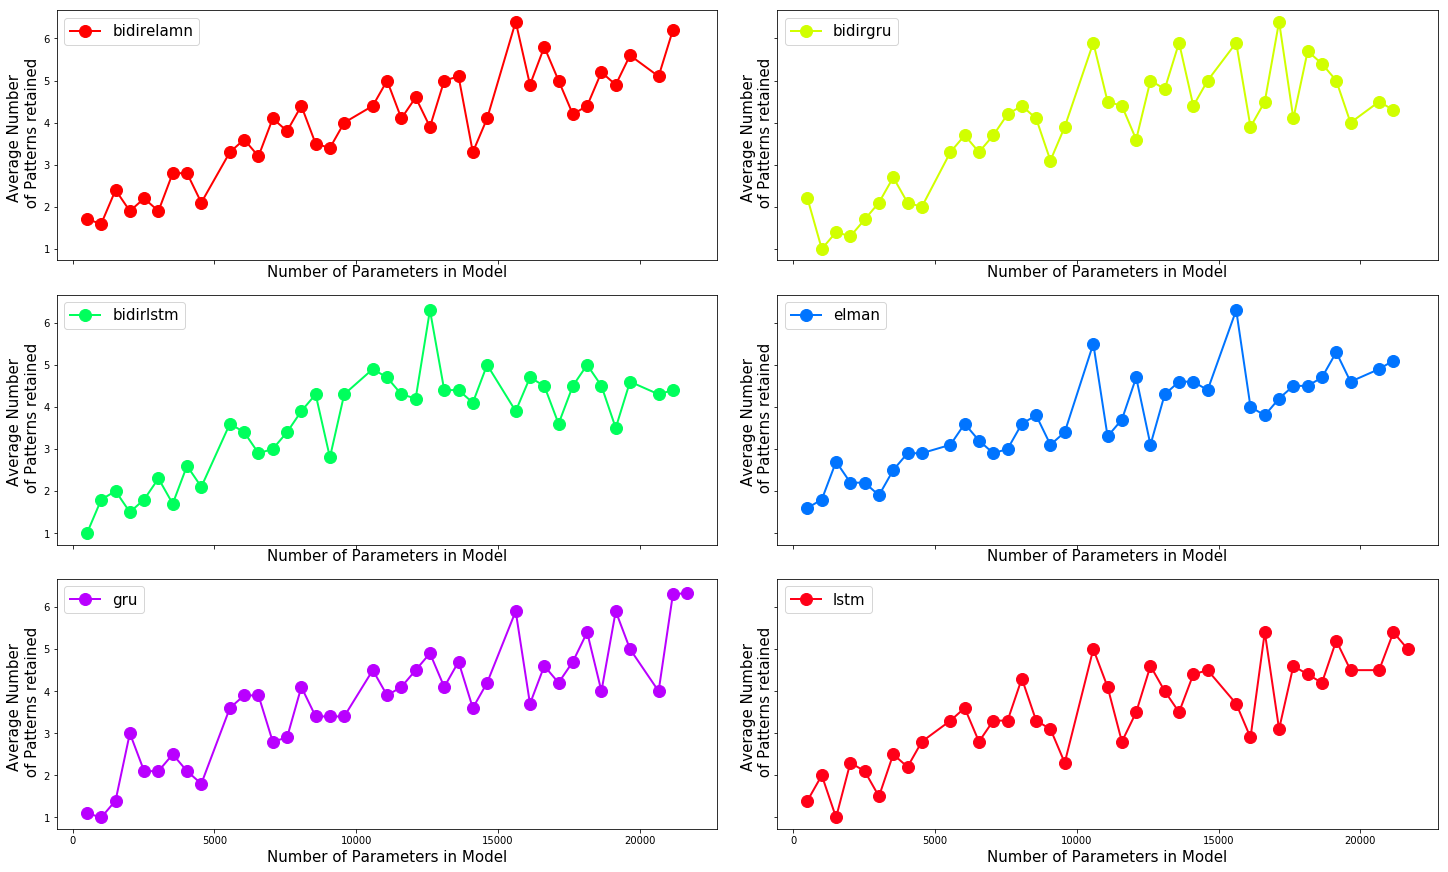

In [8]:
df_g = df.groupby(["nn_type", "model_params"]).agg({"largest_retained" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="model_params", y="largest_retained", hue="nn_type",
            x_label='Number of Parameters in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsParametersRNN_exp1_1.pdf", bbox_inches='tight')

### Correlation

In [9]:
x_col = "largest_retained"
filter_col = "nn_type"
filter_col_1 = x_col
x_label = "Number of Patterns"
for filter_val in df[filter_col].unique():
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    df_temp.dropna(inplace=True)
    print("Spearman Correlation Between "+x_label+" length and Number of Network Parameters for", filter_val, df_temp[x_col].corr(df_temp["model_params"], method="spearman"))

Spearman Correlation Between Number of Patterns length and Number of Network Parameters for lstm 0.6011409091211048
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for gru 0.8249232913486696
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for elman 0.6634073428911358
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirelamn 0.5884684371465134
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirlstm 0.7758545806859575
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirgru 0.6695280228392353


In [10]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")

print(" \\toprule")
print(" RNN  &    Spearman Correlation Coefficient \\\\")
print(" \\midrule")

filter_col = "nn_type"
filter_col_1 = x_col
for filter_val in sorted(df[filter_col].unique()):
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print(" ",filter_val, " & ", df_temp[x_col].corr(df_temp["model_params"], method="spearman"), "\\\\")

print(" \\hline")
print("\\end{tabular}")
print("\\caption{Correlation between Number of patterns retained \\\\ and the number of network parameters}")
print("\\label{tab:Number of patterns vs num network parameters}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 RNN  &    Spearman Correlation Coefficient \\
 \midrule
  bidirelamn  &  0.5884684371465134 \\
  bidirgru  &  0.6695280228392353 \\
  bidirlstm  &  0.7758545806859575 \\
  elman  &  0.6634073428911358 \\
  gru  &  0.8249232913486696 \\
  lstm  &  0.6011409091211048 \\
 \hline
\end{tabular}
\caption{Correlation between Number of patterns retained \\ and the number of network parameters}
\label{tab:Number of patterns vs num network parameters}
\end{center}
\end{table}


### Capacity

In [11]:
df_cap = df.groupby(["nn_type"]).agg({"model_params" : "sum", "largest_retained": "sum"})
df_cap["capacity_ratio"] = df_cap["largest_retained"]/df_cap["model_params"]
df_cap

,model_params,largest_retained,capacity_ratio
nn_type,,,
bidirelamn,4047120,1499,0.000370
bidirgru,4047120,1474,0.000364
bidirlstm,4047120,1382,0.000341
elman,4047120,1405,0.000347
gru,4242168,1464,0.000345
lstm,4263840,1364,0.000320


In [12]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")

print(" \\toprule")
print(" RNN  &    Pattern Capacity Per Parameter \\\\")
print(" \\midrule")

for i, r in df_cap.reset_index().iterrows():
    print(" ",r["nn_type"], " & ", round(r["capacity_ratio"], 7), "\\\\")

    
print(" \\hline")
print("\\end{tabular}")
print("\\caption{Number of patterns retained \\\\ per single network parameter}")
print("\\label{tab:Number of patterns single param}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 RNN  &    Pattern Capacity Per Parameter \\
 \midrule
  bidirelamn  &  0.0003704 \\
  bidirgru  &  0.0003642 \\
  bidirlstm  &  0.0003415 \\
  elman  &  0.0003472 \\
  gru  &  0.0003451 \\
  lstm  &  0.0003199 \\
 \hline
\end{tabular}
\caption{Number of patterns retained \\ per single network parameter}
\label{tab:Number of patterns single param}
\end{center}
\end{table}


### Discussion of results

From the Pearson coefficient, it is clear that there is a positive relationship between the number of patterns that can be retained and the number of network parameters required for all recurrent neural networks. This relationship is more apprent in the Elman RNN en the bidirectional Elman RNN, indicating that they are more dependant on the number of parameters within the network. The network which shows the least dependance is the LSTM and the bidrectional lstm. 

Upon inspecting the the relationship between the number of model parameters and the number of parameters required, as presented in the figure **need to revise in thesis**, it is clear that it is non-linear. This may be the consequence of the variance of the generated datasets at these intervals. Thus, it seems that the number of parameters required is highly depedant on the dataset in question.  

## 2. Investigate which activation function lead to the highest retention of patterns

In [13]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")
print(" \\toprule")
print(" Activation function  &    Spearman Correlation Coefficient \\\\")
print(" \\midrule")

filter_col = "activation_func"
filter_col_1 = x_col
for filter_val in sorted(df[filter_col].unique()):
    df_temp = df[(df[filter_col] == filter_val)]
    df_temp = df_temp.groupby([filter_col_1]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[filter_col_1] = df_temp[filter_col_1].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print(" ",filter_val, " & ", df_temp[filter_col_1].corr(df_temp["model_params"], method='spearman', ), "\\\\")
    
    

print(" \\hline")
print("\\end{tabular}")
print("\\caption{Correlation between Number of patterns retained \\\\ and the number of network parameters \\\\ for each activation function}")
print("\\label{tab:Number of patterns vs num network parameters for each activation function}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 Activation function  &    Spearman Correlation Coefficient \\
 \midrule
  elu  &  0.7289312761251283 \\
  hard_sigmoid  &  0.6 \\
  linear  &  1.0 \\
  relu  &  0.8586956521739131 \\
  selu  &  0.8774098946409358 \\
  sigmoid  &  0.3142857142857143 \\
  softmax  &  -0.9999999999999999 \\
  softplus  &  0.48571428571428577 \\
  softsign  &  0.8406593406593407 \\
  tanh  &  0.7666666666666667 \\
 \hline
\end{tabular}
\caption{Correlation between Number of patterns retained \\ and the number of network parameters \\ for each activation function}
\label{tab:Number of patterns vs num network parameters for each activation function}
\end{center}
\end{table}


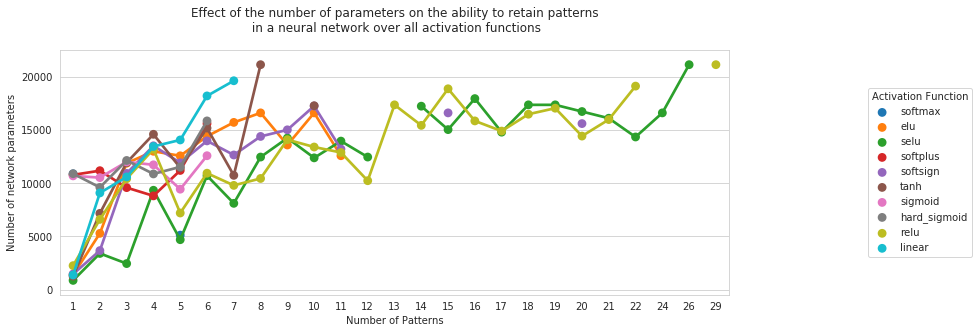

In [14]:
filter_col = "activation_func"
filter_1 = "largest_retained"
x_col = "largest_retained"
x_label = "Number of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability to retain patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="activation_func",
               legend_title="Activation Function",
              filter_col=filter_col, filter_val=None, df=df)    

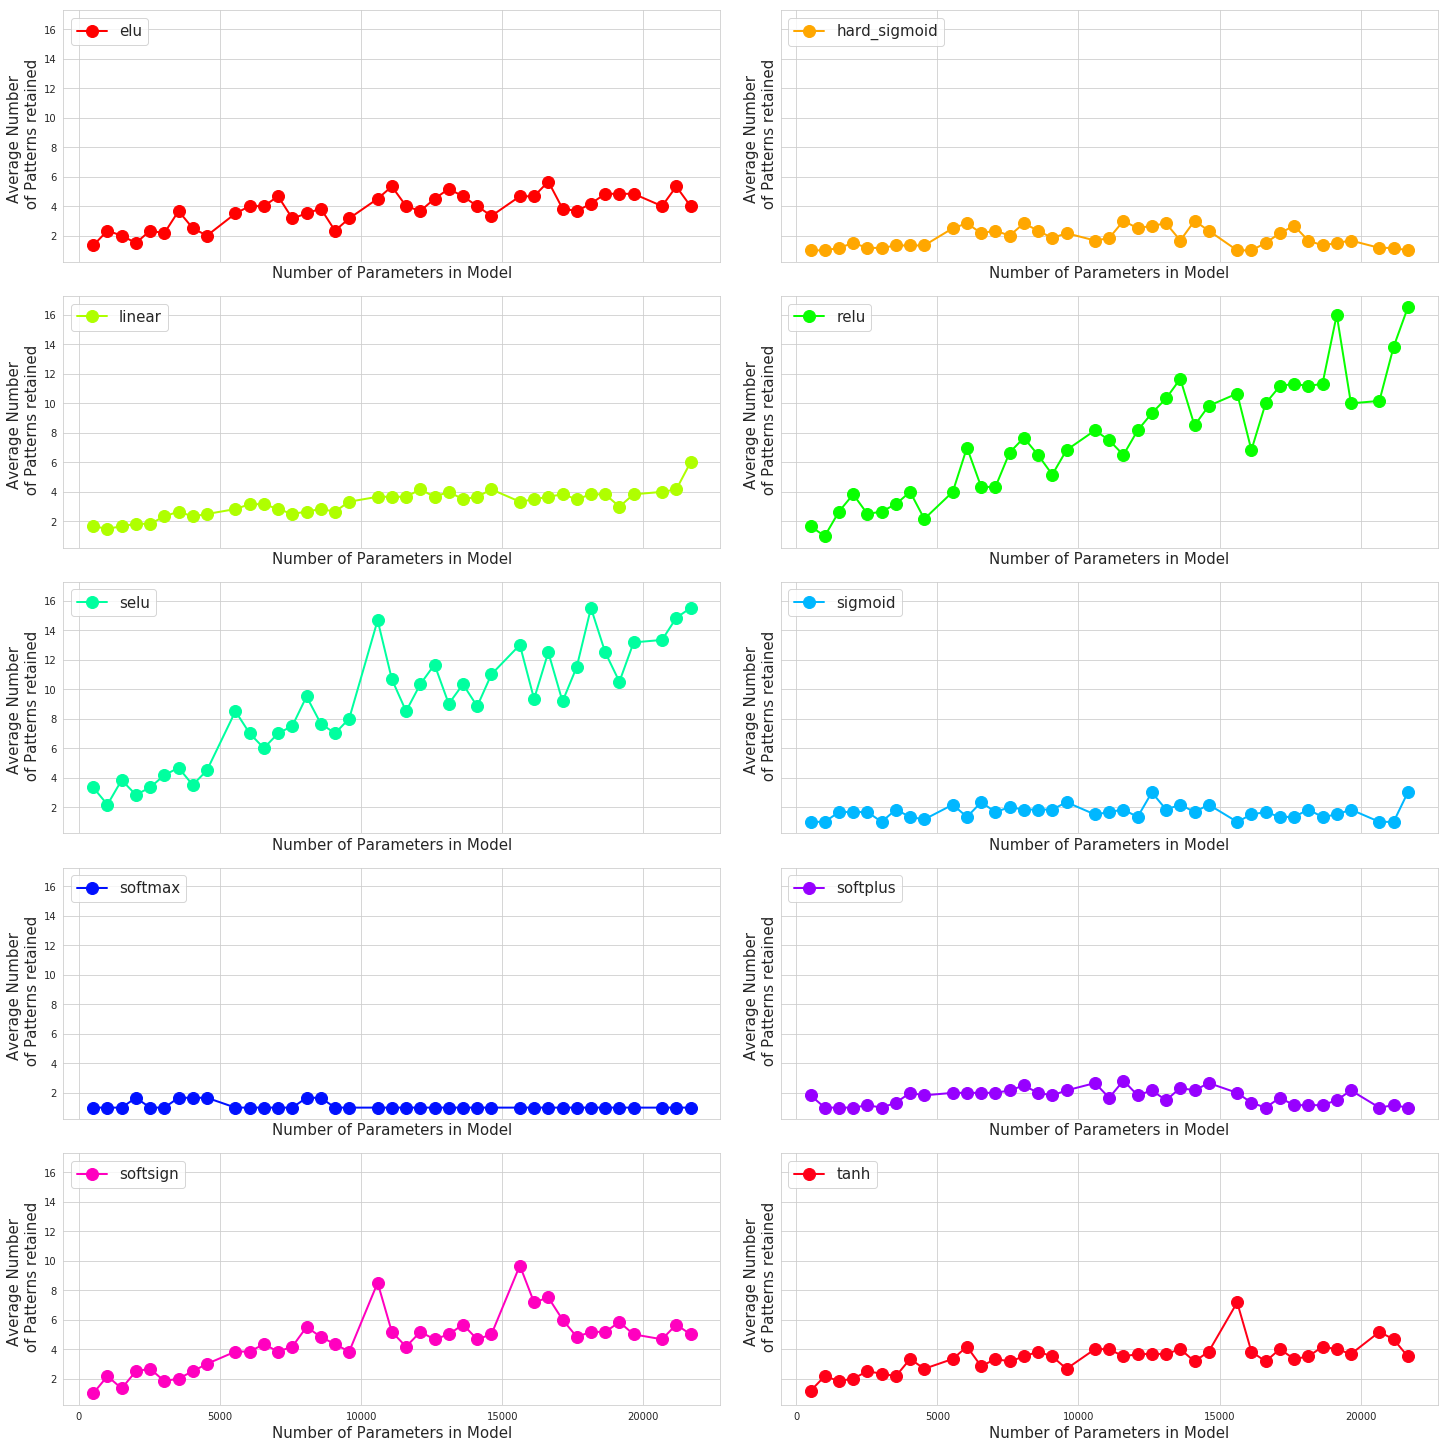

In [15]:
df_g = df.groupby(["activation_func", "model_params"]).agg({"largest_retained" : "mean"}).reset_index()

fig = plot_line_sub_plots(df_g, 
            x="model_params", y="largest_retained", hue="activation_func",
            x_label='Number of Parameters in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsParametersActFunc_exp1_1.pdf", bbox_inches='tight')

### Correlation of activation functions  ∝ number of patterns

In [16]:
filter_col = "activation_func"
df_correlation_matrix = pd.DataFrame(columns=df["nn_type"].unique())
df_correlation_matrix["activation_func"] = df[filter_col].unique()
df_correlation_matrix.index =  df_correlation_matrix["activation_func"]
del df_correlation_matrix["activation_func"]
for filter_val in df[filter_col].unique():
    for filter_val_1 in df["nn_type"].unique():
        df_temp = df[(df["nn_type"] == filter_val_1) & (df["activation_func"] == filter_val)]
        df_temp["model_params"] = df_temp["model_params"].astype(float)
        df_correlation_matrix.at[filter_val, filter_val_1] =   df_temp[filter_col_1].corr(df_temp["model_params"], method="spearman")
        print("df_correlation_matrix Correlation Between "+x_label+" and Number of Network Parameters for", filter_val_1 + " "+ filter_val, df_temp[filter_col_1].corr(df_temp["model_params"], method="spearman"), df_temp[filter_col_1].cov(df_temp["model_params"]))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for lstm softmax nan 0.0
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for gru softmax -0.35054260362909434 -2444.5020242914984
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for elman softmax -0.15741492055040288 -661.0071123755333
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirelamn softmax nan 0.0
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirlstm softmax nan 0.0
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirgru softmax -0.08597678402922149 -504.7169274537697
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for lstm elu 0.37832282521107324 3613.700404858299
df_correlation_matrix Correla

df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for gru linear 0.5753625545646768 4737.098150782361
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for elman linear 0.1906758195942629 1035.6017069701281
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirelamn linear 0.368058822216603 1856.8421052631575
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirlstm linear 0.5013912253937636 4370.031294452348
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirgru linear 0.6265106563855104 5600.995732574678


In [29]:
filter_col_1

'largest_retained'

In [17]:
df_temp["largest_retained"].corr(df_temp["model_params"])

0.6517533529295266

In [18]:
df_correlation_matrix

,lstm,gru,elman,bidirelamn,bidirlstm,bidirgru
activation_func,,,,,,
softmax,NaN,-0.350543,-0.157415,NaN,NaN,-0.0859768
elu,0.378323,0.580297,0.545938,0.570327,0.439753,0.593598
selu,0.759611,0.757256,0.846004,0.554224,0.796931,0.665365
softplus,0.0702322,-0.0628006,-0.257553,-0.382103,0.00642058,0.170931
softsign,0.280889,0.659206,0.689452,0.700338,0.490353,0.672387
tanh,0.575483,0.357078,0.362984,0.643932,0.339224,0.459441
sigmoid,0.179545,0.326887,-0.448235,-0.364733,-0.111512,0.357695
hard_sigmoid,-0.040393,0.38754,-0.57367,-0.462919,0.207582,0.360088
relu,0.532017,0.643596,0.817691,0.863373,0.468254,0.656019


In [19]:
df_correlation_matrix.sort_index(inplace=True)
df_correlation_matrix = df_correlation_matrix[sorted(df_correlation_matrix.columns)]
for c in df_correlation_matrix.columns:
    df_correlation_matrix[c] = df_correlation_matrix[c].apply(lambda x: round(x, 4)) 

df_correlation_matrix.sort_index(inplace=True)
print("\\begin{table}[h!]")
print("{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\\\")
print("\\midrule")
print(df_correlation_matrix.to_latex())
print("\\caption{Correlation between Number of patterns retained \\\\ and the number of network parameters \\\\ per activation function for each RNN}")
print("\\label{tab:Number of patterns per Activation function vs num network parameters for each RNN}")
print("\\end{table}")

\begin{table}[h!]
{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
\midrule
\begin{tabular}{lrrrrrr}
\toprule
{} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
activation\_func &             &           &            &         &         &         \\
\midrule
elu             &      0.5703 &    0.5936 &     0.4398 &  0.5459 &  0.5803 &  0.3783 \\
hard\_sigmoid    &     -0.4629 &    0.3601 &     0.2076 & -0.5737 &  0.3875 & -0.0404 \\
linear          &      0.3681 &    0.6265 &     0.5014 &  0.1907 &  0.5754 &  0.8056 \\
relu            &      0.8634 &    0.6560 &     0.4683 &  0.8177 &  0.6436 &  0.5320 \\
selu            &      0.5542 &    0.6654 &     0.7969 &  0.8460 &  0.7573 &  0.7596 \\
sigmoid         &     -0.3647 &    0.3577 &    -0.1115 & -0.4482 &  0.3269 &  0.1795 \\
softmax         &         NaN &   -0.0860 &        NaN & -0.1574 & -0.3505 &     NaN \\
softplus        &     -0.3821 &    0.1709 &     0.0064 

### Capacity

In [20]:
df_cap = df.groupby(["nn_type", "activation_func"]).agg({"model_params" : "sum", "largest_retained": "sum"})
df_cap["capacity_ratio"] = df_cap["largest_retained"]/df_cap["model_params"]
df_cap = pd.DataFrame(df_cap.to_records())
df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap.sort_index(inplace=True)
df_cap

nn_type,bidirelamn,bidirgru,bidirlstm,elman,gru,lstm
activation_func,,,,,,
elu,0.000373,0.000393,0.000341,0.000319,0.000335,0.000324
hard_sigmoid,0.000148,0.000235,0.000146,0.000146,0.000195,0.000159
linear,0.000257,0.000353,0.000304,0.000225,0.000324,0.000300
relu,0.001122,0.000561,0.000435,0.001020,0.000612,0.000408
selu,0.000608,0.000810,0.001065,0.000657,0.000823,0.000924
sigmoid,0.000124,0.000185,0.000141,0.000138,0.000195,0.000136
softmax,0.000094,0.000114,0.000094,0.000104,0.000120,0.000091
softplus,0.000106,0.000200,0.000198,0.000106,0.000174,0.000181
softsign,0.000553,0.000442,0.000339,0.000479,0.000335,0.000389


In [21]:
df_cap.sort_index(inplace=True)
df_cap = df_cap[sorted(df_cap.columns)]
# for c in df_cap.columns:
#     df_cap[c] = df_cap[c].apply(lambda x: round(x, 8)) 

df_cap.sort_index(inplace=True)
print("\\begin{table}[h!]")
print("{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\\\")
print("\\midrule")
print(df_cap.to_latex())
print("\\caption{Per parameter capacity between Number of patterns retained \\\\ and the number of network parameters \\\\ per activation function for each RNN}")
print("\\label{tab:Number of patterns per Activation function vs num network parameters for each RNN}")
print("\\end{table}")

\begin{table}[h!]
{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
\midrule
\begin{tabular}{lrrrrrr}
\toprule
nn\_type &  bidirelamn &  bidirgru &  bidirlstm &     elman &       gru &      lstm \\
activation\_func &             &           &            &           &           &           \\
\midrule
elu             &    0.000373 &  0.000393 &   0.000341 &  0.000319 &  0.000335 &  0.000324 \\
hard\_sigmoid    &    0.000148 &  0.000235 &   0.000146 &  0.000146 &  0.000195 &  0.000159 \\
linear          &    0.000257 &  0.000353 &   0.000304 &  0.000225 &  0.000324 &  0.000300 \\
relu            &    0.001122 &  0.000561 &   0.000435 &  0.001020 &  0.000612 &  0.000408 \\
selu            &    0.000608 &  0.000810 &   0.001065 &  0.000657 &  0.000823 &  0.000924 \\
sigmoid         &    0.000124 &  0.000185 &   0.000141 &  0.000138 &  0.000195 &  0.000136 \\
softmax         &    0.000094 &  0.000114 &   0.000094 &  0.000104 &  0.000120 &  0.00009

## 3. Relationship between the number of patterns and number of layers

In [22]:
df["num_layers"] = df["nodes_in_layer"].apply(len)
df.groupby(["num_layers", "model_params"]).agg({"largest_retained": "mean"})

largest_retained
num_layers model_params                  
1          504                   1.500000
           1008                  1.533333
           1512                  1.816667
           2016                  2.033333
           2520                  2.016667
           3024                  1.966667
           3528                  2.450000
           4032                  2.450000
           4536                  2.283333
2          5544                  3.366667
           6048                  3.633333
           6552                  3.216667
           7056                  3.300000
           7560                  3.433333
           8064                  4.116667
           8568                  3.733333
           9072                  3.150000
           9576                  3.550000
3          10584                 5.033333
           11088                 4.250000
           11592                 3.900000
           12096                 4.183333
           12600                 4.633333
           13104                 4.433333
           13608                 4.700000
           14112                 4.066667
           14616                 4.533333
4          15624                 5.350000
           16128                 4.016667
           16632                 4.766667
           17136                 4.416667
           17640                 4.433333
           18144                 4.900000
           18648                 4.666667
           19152                 4.966667
           19656                 4.716667
5          20664                 4.550000
           21168                 5.283333
           21672                 5.631579

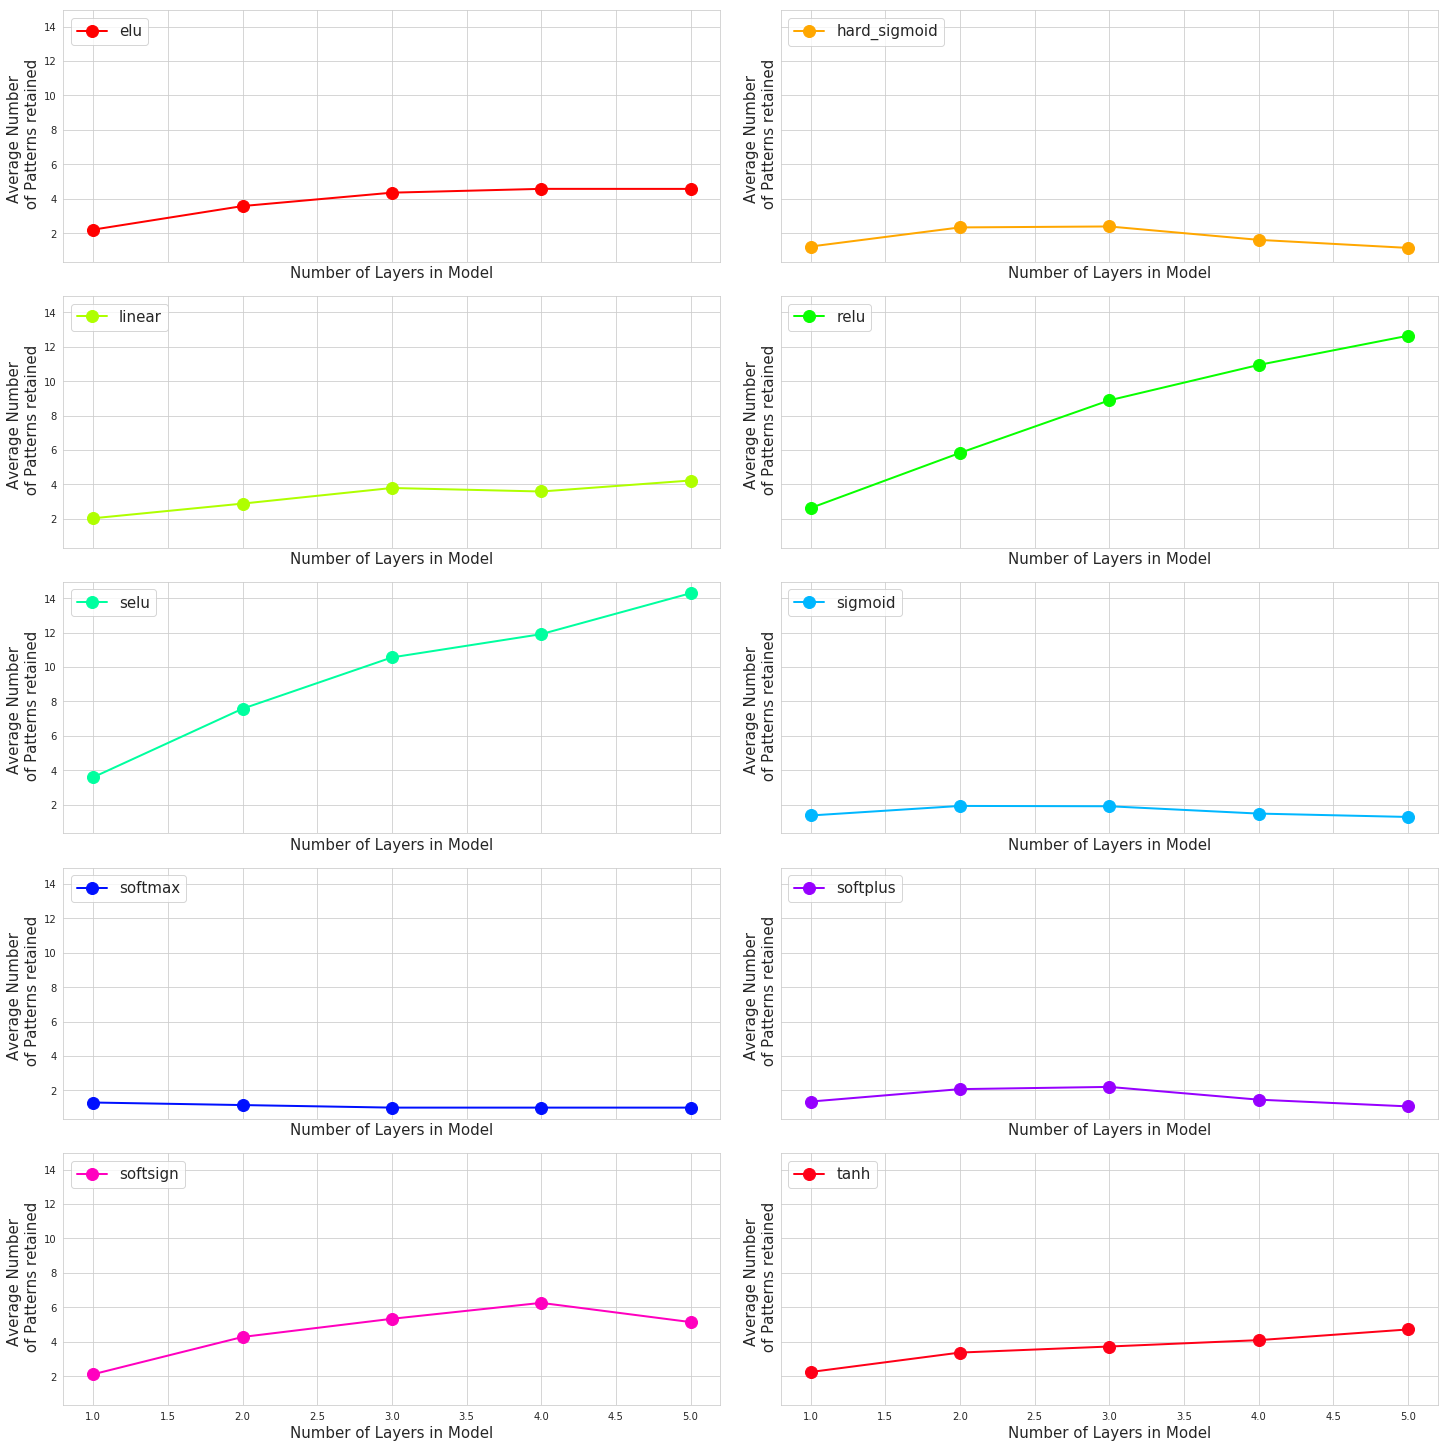

In [23]:
df_g = df.groupby(["activation_func", "num_layers"]).agg({"largest_retained" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="num_layers", y="largest_retained", hue="activation_func",
            x_label='Number of Layers in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsNumLayersActFunc_exp1_1.pdf", bbox_inches='tight')

In [24]:
df_cap = df.groupby(["nn_type", "activation_func", "num_layers"]).agg({"model_params" : "mean", "largest_retained": "max"})
df_cap = pd.DataFrame(df_cap.to_records())
df_cap["capacity_ratio"] = df_cap["largest_retained"]/df_cap["model_params"]
# df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

,nn_type,activation_func,num_layers,model_params,largest_retained,capacity_ratio
0,bidirelamn,elu,1,2520,4,0.001587
1,bidirelamn,elu,2,7560,7,0.000926
2,bidirelamn,elu,3,12600,5,0.000397
3,bidirelamn,elu,4,17640,9,0.000510
4,bidirelamn,elu,5,20916,5,0.000239
5,bidirelamn,hard_sigmoid,1,2520,2,0.000794
6,bidirelamn,hard_sigmoid,2,7560,4,0.000529
7,bidirelamn,hard_sigmoid,3,12600,2,0.000159
8,bidirelamn,hard_sigmoid,4,17640,1,0.000057
9,bidirelamn,hard_sigmoid,5,20916,1,0.000048


In [25]:
df_cap["capacity_ratio_diff"] = [0]*df_cap.shape[0]
prev_nn = ""
prev_activation = ""
prev_cap_ratio = ""
for i, row in df_cap.iterrows():
    if row["nn_type"] == prev_nn and row["activation_func"] == prev_activation:
        df_cap.iloc[i, df_cap.columns.get_loc('capacity_ratio_diff')] = row["capacity_ratio"] - prev_cap_ratio
    else:
        df_cap.iloc[i, df_cap.columns.get_loc('capacity_ratio_diff')] = np.nan
    prev_nn = row["nn_type"]
    prev_activation = row["activation_func"]
    prev_cap_ratio = row["capacity_ratio"]
df_cap

,nn_type,activation_func,num_layers,model_params,largest_retained,capacity_ratio,capacity_ratio_diff
0,bidirelamn,elu,1,2520,4,0.001587,NaN
1,bidirelamn,elu,2,7560,7,0.000926,-0.000661
2,bidirelamn,elu,3,12600,5,0.000397,-0.000529
3,bidirelamn,elu,4,17640,9,0.000510,0.000113
4,bidirelamn,elu,5,20916,5,0.000239,-0.000271
5,bidirelamn,hard_sigmoid,1,2520,2,0.000794,NaN
6,bidirelamn,hard_sigmoid,2,7560,4,0.000529,-0.000265
7,bidirelamn,hard_sigmoid,3,12600,2,0.000159,-0.000370
8,bidirelamn,hard_sigmoid,4,17640,1,0.000057,-0.000102
9,bidirelamn,hard_sigmoid,5,20916,1,0.000048,-0.000009


In [26]:
df_cap_group = df_cap.groupby(["activation_func", "num_layers"]).agg({"capacity_ratio": "mean"}).reset_index()
df_cap_group

,activation_func,num_layers,capacity_ratio
0,elu,1,0.001852
1,elu,2,0.000728
2,elu,3,0.000556
3,elu,4,0.000378
4,elu,5,0.000262
5,hard_sigmoid,1,0.000595
6,hard_sigmoid,2,0.000551
7,hard_sigmoid,3,0.000317
8,hard_sigmoid,4,0.000161
9,hard_sigmoid,5,0.000055


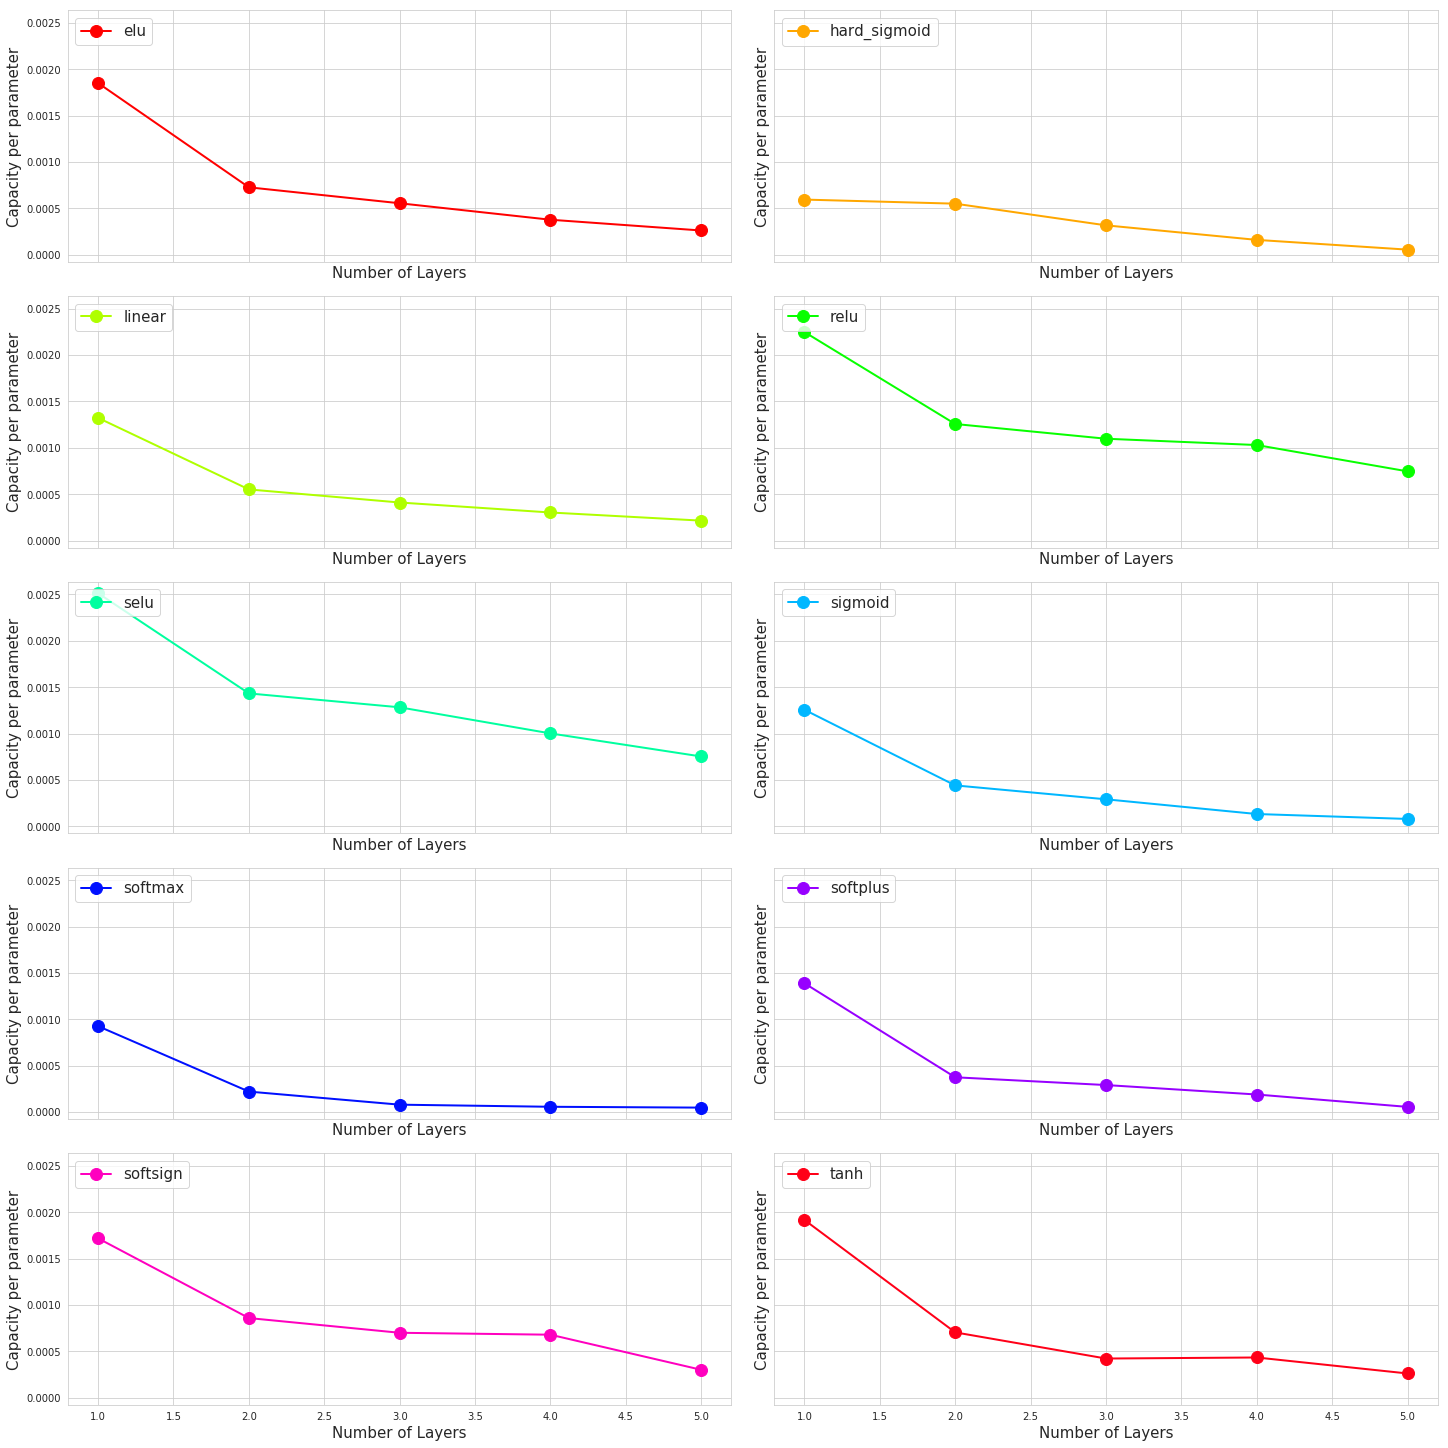

In [27]:
fig = plot_line_sub_plots(df_cap_group, 
            x="num_layers", y="capacity_ratio", hue="activation_func",
            x_label='Number of Layers', y_label='Capacity per parameter')

fig.savefig("Images/CapacityPerParameterVsNumLayersActFunc_exp1_1.pdf", bbox_inches='tight')

In [28]:
print("\\begin{table}[h!]")

latex_str = df_cap.groupby(["nn_type", "num_layers", "activation_func"]).agg({"capacity_ratio":"max"}).unstack().to_latex()
latex_str = latex_str.replace("nn\\_type", "RNN Type")
latex_str = latex_str.replace("num\\_layers", "Number of Layers")
latex_str = latex_str.replace("capacity\\_ratio", "Capacity Per Parameter")
print(latex_str)


print("""\\caption{Per parameter capacity for each RNN \\\\ 
            per activation function  \\\\  
              at various layer depths}""")
print("\\label{tab:Number of patterns per Activation Per RNN Per Layer}")
print("\\end{table}")

\begin{table}[h!]
\begin{tabular}{llrrrrrrrrrr}
\toprule
     & {} & \multicolumn{10}{l}{Capacity Per Parameter} \\
     & activation\_func &            elu & hard\_sigmoid &    linear &      relu &      selu &   sigmoid &   softmax &  softplus &  softsign &      tanh \\
RNN Type & Number of Layers &                &              &           &           &           &           &           &           &           &           \\
\midrule
bidirelamn & 1 &       0.001587 &     0.000794 &  0.001190 &  0.002778 &  0.002778 &  0.000794 &  0.000397 &  0.001190 &  0.001587 &  0.001587 \\
     & 2 &       0.000926 &     0.000529 &  0.000529 &  0.001852 &  0.001455 &  0.000397 &  0.000132 &  0.000132 &  0.001058 &  0.000397 \\
     & 3 &       0.000397 &     0.000159 &  0.000397 &  0.001667 &  0.000873 &  0.000159 &  0.000079 &  0.000079 &  0.000794 &  0.000397 \\
     & 4 &       0.000510 &     0.000057 &  0.000227 &  0.001247 &  0.000567 &  0.000057 &  0.000057 &  0.000057 &  0.000624 &  0.0005